# **Assignment 2: AutoML**

Author: Aashay Pawar

NUID: 002134382

Task:

In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.


Answer the following questions for all of the models:

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

# **What is AutoML?**

AutoML (Automated Machine Learning) refers to the use of automated techniques and tools to automate the end-to-end process of building and deploying machine learning models. It aims to simplify and accelerate the machine learning workflow, making it accessible to non-experts and experts alike.

AutoML platforms automate the process of selecting and optimizing algorithms, hyperparameters, and data preprocessing techniques to generate a highly accurate machine learning model. AutoML tools typically involve a combination of techniques such as neural architecture search, meta-learning, and Bayesian optimization to automate the model selection and optimization process.

AutoML can help solve many challenges in machine learning, such as reducing the time and resources needed to develop a high-performing model, improving reproducibility, and enabling organizations to scale machine learning projects quickly. Overall, AutoML is a powerful tool for democratizing machine learning and making it accessible to more people.

# **Problem Statement / Goal:**

Given the dataset containing information about various details of used vehicles, including car name, price in rupees, kilometers driven, fuel type, transmission type, ownership status, manufacture year, engine specifications, and number of seats, my goal is to develop a predictive model that can accurately predict used car prices.


The resulting predictive model can then be used to estimate the value of a used car, which can be useful for me as a buyer or seller. By accurately predicting the price of a used car, I can make informed decisions about the value of a car, while also helping sellers optimize their pricing strategies to maximize their profits. Overall, my goal of predicting used car prices using this dataset is to provide valuable insights into the automobile market and facilitate more informed decisions for both buyers and sellers.

#Importing Libraries

In [77]:
# Installing and Initializing H2O
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
# Importing libraries that we are going to use in this project
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import statsmodels.api as sm
import io
from h2o.estimators import H2ORandomForestEstimator
from sklearn.ensemble import RandomForestRegressor

# Setting h2o

Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

We are initializing H2O in the following steps.

In [79]:
# Settings for the number of threads and maximum memory 
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,59 mins 56 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_nrx5so
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.988 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Loading Dataset

In [80]:
# Loading the dataset in a pandas data frame variable 'df' and checking the dtype
df = pd.read_csv('https://raw.githubusercontent.com/pawar-aa/NFO6105-33201-Data-Sci-Eng-Methods/main/car_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


We run df.info() to check the datatype of the column variables.

In [81]:
#checking null values
df.isnull().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

The outputs indicates that there are no missing values in any of the columns.

In [82]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


Here we can see that some variables are either not needed or not in correct format.


1.   'Unnamed: 0' and 'car_name' are unwanted variable.
2.   Variables 'car_prices_in_rupee', 'kms_driven', 'ownership', 'manufacture', and 'engine' are expected to be in integer type.
3.   Instead of manufacture, there can be a column 'age'.


So we now try to drop, alter, and create the required columns.

# Data Pre-processing

In [83]:
# CAR PRICE
# iterate over each value in the 'car_prices_in_rupee' column
for i, value in enumerate(df['car_prices_in_rupee']):
        # check if the value contains 'Lakh'
        if 'Lakh' in value:
            # replace 'Lakh' with an empty string
            value = value.replace('Lakh', '')
            # convert the value to a float
            value = int(float(value) * 100000)
        # check if the value contains 'Crore'
        elif 'Crore' in value:
            # replace 'Crore' with an empty string
            value = value.replace('Crore', '')
            # convert the value to a float
            value = int(float(value) * 10000000)
        # update the value in the dataframe
        df.at[i, 'car_prices_in_rupee'] = value
        
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].str.replace(',', '')
df['car_prices_in_rupee'] = pd.to_numeric(df['car_prices_in_rupee'], errors='coerce')
df.dropna(subset=['car_prices_in_rupee'], inplace=True)
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].astype('int64')

# KILOMETERS DRIVEN    
df['kms_driven'] = df['kms_driven'].str.replace('kms', '').str.replace(',', '').astype(int)

# OWNERSHIP TYPE    
df['ownership'] = df['ownership'].replace({'1st Owner': 1, '2nd Owner': 2,'3rd Owner': 3, '4th Owner': 4, '5th Owner': 5, '0th Owner': 0}).astype(int)

# ENGINE CAPACITY IN CC
df['engine'] = df['engine'].str.replace('cc', '').astype(int)

#calculating car age
df['age']=2023- df['manufacture']

#dropping unnecessary feature
df.drop(labels= ['Unnamed: 0'], axis= 1, inplace= True)          
df.drop(labels= ['car_name'], axis= 1, inplace= True)
df.drop(labels= ['manufacture'], axis= 1, inplace= True) 

In [84]:
# Checking if the dataset is as desired
df.head()

,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,age
238,99999,80000,Petrol,Manual,3,1298,5 Seats,16
243,55000,90000,Petrol,Manual,3,993,5 Seats,21
342,84778,70229,Petrol,Manual,4,796,5 Seats,15
675,59000,60000,Petrol,Manual,1,1497,5 Seats,16
734,90000,80000,Petrol,Manual,2,2993,5 Seats,15


In [85]:
# Checking if the dataset has no null values
df.isnull().sum()

car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
engine                 0
Seats                  0
age                    0
dtype: int64

In [86]:
# Checking the dataype of column 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 238 to 5439
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_prices_in_rupee  123 non-null    int64 
 1   kms_driven           123 non-null    int64 
 2   fuel_type            123 non-null    object
 3   transmission         123 non-null    object
 4   ownership            123 non-null    int64 
 5   engine               123 non-null    int64 
 6   Seats                123 non-null    object
 7   age                  123 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 8.6+ KB


In [87]:
from sklearn.preprocessing import MinMaxScaler

# Separate numeric and categorical features
numeric_features = ['kms_driven', 'engine', 'age', 'car_prices_in_rupee']
categorical_features = ['fuel_type', 'transmission', 'ownership', 'Seats']

# Normalize numeric features
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# One-hot encode categorical features
data = pd.get_dummies(df, columns=categorical_features)

data.head()

,car_prices_in_rupee,kms_driven,engine,age,fuel_type_Diesel,fuel_type_Lpg,fuel_type_Petrol,transmission_Automatic,transmission_Manual,ownership_1,ownership_2,ownership_3,ownership_4,ownership_5,Seats_4 Seats,Seats_5 Seats,Seats_7 Seats,Seats_8 Seats
238,1.000000,0.278402,0.228493,0.470588,0,0,1,0,1,0,0,1,0,0,0,1,0,0
243,0.307697,0.315741,0.089668,0.764706,0,0,1,0,1,0,0,1,0,0,0,1,0,0
342,0.765827,0.241918,0.000000,0.411765,0,0,1,0,1,0,0,0,1,0,0,1,0,0
675,0.369236,0.203724,0.319071,0.470588,0,0,1,0,1,1,0,0,0,0,0,1,0,0
734,0.846167,0.278402,1.000000,0.411765,0,0,1,0,1,0,1,0,0,0,0,1,0,0


From the above results, we can say that our dataset is ready in desired format for the upcoming operations.

#Building the model

To start build the model, we first divide the data into training and testing datasets.

In [88]:
np.random.seed(0)
df_train,df_test = train_test_split(data, test_size=0.3, random_state=100)
scaler= StandardScaler()

features=numeric_features + ["fuel_type_Diesel", "fuel_type_Lpg",  "fuel_type_Petrol",
            "transmission_Automatic", "transmission_Manual",
            "ownership_1",  "ownership_2",  "ownership_3",  "ownership_4",  "ownership_5",
            "Seats_4 Seats",	"Seats_5 Seats",	"Seats_7 Seats",	"Seats_8 Seats"]

#scaling the training data(fitting the parameters and transforming the values)
df_train[features]=scaler.fit_transform(df_train[features])

#transforming the test data.We avoid fitting the values to prevent data leakage!
df_test[features]=scaler.transform(df_test[features])

#We will drop the Car_Name column from training and test data because it only has text info that the linear regression model can't use!
a_test=df_test.drop(columns=['car_prices_in_rupee'],axis=1)
b_test=df_test['car_prices_in_rupee']

a_train=df_train.drop(columns=['car_prices_in_rupee'],axis=1)
b_train=df_train['car_prices_in_rupee']

In [89]:
#finding dependencies of independent variable on target variable using OLS regression model
model = sm.OLS(data['car_prices_in_rupee'], data[["kms_driven",
            "engine",
            "age",
            "fuel_type_Diesel", "fuel_type_Lpg",  "fuel_type_Petrol",
            "transmission_Automatic", "transmission_Manual",
            "ownership_1",  "ownership_2",  "ownership_3",  "ownership_4",  "ownership_5",
            "Seats_4 Seats",	"Seats_5 Seats",	"Seats_7 Seats",	"Seats_8 Seats"]]).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     car_prices_in_rupee   R-squared:                       0.153
Model:                             OLS   Adj. R-squared:                  0.052
Method:                  Least Squares   F-statistic:                     1.516
Date:                 Sun, 16 Apr 2023   Prob (F-statistic):              0.123
Time:                         03:35:46   Log-Likelihood:                 1.7357
No. Observations:                  123   AIC:                             24.53
Df Residuals:                      109   BIC:                             63.90
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
kms_driven                 0.0648      0.185      0.350      0.727      -0.302       0.431
engine                    -0.1109      0.120     -0.924      0.358      -0.349       0.127
age                       -0.3678      0.124     -2.969      0.004      -0.613      -0.122
fuel_type_Diesel           0.3083      0.081      3.792      0.000       0.147       0.469
fuel_type_Lpg              0.2381      0.095      2.519      0.013       0.051       0.425
fuel_type_Petrol           0.2166      0.062      3.512      0.001       0.094       0.339
transmission_Automatic     0.4682      0.244      1.919      0.058      -0.015       0.952
transmission_Manual        0.2948      0.138      2.135      0.035       0.021       0.568
ownership_1                0.1153      0.056      2.074      0.040       0.005       0.226
ownership_2                0.0990      0.056      1.757      0.082      -0.013       0.211
ownership_3                0.2458      0.063      3.908      0.000       0.121       0.370
ownership_4                0.0762      0.066      1.150      0.252      -0.055       0.207
ownership_5                0.2267      0.131      1.735      0.086      -0.032       0.486
Seats_4 Seats              0.3302      0.187      1.768      0.080      -0.040       0.700
Seats_5 Seats              0.1692      0.094      1.794      0.076      -0.018       0.356
Seats_7 Seats              0.1053      0.113      0.933      0.353      -0.118       0.329
Seats_8 Seats              0.1583      0.144      1.097      0.275      -0.128       0.444
==============================================================================
Omnibus:                        5.875   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.963
Skew:                          -0.536   Prob(JB):                       0.0507
Kurtosis:                       2.883   Cond. No.                     3.71e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the above output, we shall look at p-value. I shall be selecting only those features where p-value is less than 0.05.

So we can assume **"age"** as a significant predictor.

# Finding correlation between variables

A response from ChatGPT say:

A **correlation matrix** is a table that displays the correlation coefficients between pairs of variables. Correlation coefficients measure the strength and direction of the linear relationship between two variables.



So we will run the following scripts to see and visualize the correlation between the variables.

In [90]:
# check the correlation matrix
data.corr()

,car_prices_in_rupee,kms_driven,engine,age,fuel_type_Diesel,fuel_type_Lpg,fuel_type_Petrol,transmission_Automatic,transmission_Manual,ownership_1,ownership_2,ownership_3,ownership_4,ownership_5,Seats_4 Seats,Seats_5 Seats,Seats_7 Seats,Seats_8 Seats
car_prices_in_rupee,1.000000,0.044721,-0.082182,-0.258641,0.134793,0.027610,-0.128687,0.076434,-0.076434,-0.082082,-0.074339,0.182996,0.002437,0.039013,0.089467,0.033519,-0.085760,0.012199
kms_driven,0.044721,1.000000,-0.016314,0.081776,0.286547,0.092386,-0.294595,-0.043921,0.043921,-0.108133,0.017308,-0.039071,0.112074,0.134395,-0.028041,0.169998,-0.136812,-0.094636
engine,-0.082182,-0.016314,1.000000,-0.160428,-0.100711,0.154278,-0.013020,-0.047329,0.047329,-0.122717,0.223202,-0.074911,-0.051625,-0.047404,-0.078209,0.026425,0.035468,-0.059116
age,-0.258641,0.081776,-0.160428,1.000000,-0.081518,-0.125991,0.146041,0.077328,-0.077328,0.128210,-0.055854,0.035598,-0.164530,0.042765,0.053532,-0.062272,0.109705,-0.111039
fuel_type_Diesel,0.134793,0.286547,-0.100711,-0.081518,1.000000,-0.070969,-0.782557,-0.028373,0.028373,-0.091091,0.105349,0.016321,-0.022609,-0.049552,-0.040291,0.036494,0.001623,-0.049552
fuel_type_Lpg,0.027610,0.092386,0.154278,-0.125991,-0.070969,1.000000,-0.565472,-0.020502,0.020502,0.007913,0.054941,0.002495,-0.081158,-0.035806,-0.029114,-0.136827,0.061292,0.208867
fuel_type_Petrol,-0.128687,-0.294595,-0.013020,0.146041,-0.782557,-0.565472,1.000000,0.036257,-0.036257,0.070380,-0.121400,-0.015052,0.069349,0.063320,0.051487,0.055226,-0.039598,-0.089393
transmission_Automatic,0.076434,-0.043921,-0.047329,0.077328,-0.028373,-0.020502,0.036257,1.000000,-1.000000,-0.061690,-0.071197,-0.039895,0.252621,-0.014315,0.704203,-0.234127,-0.028373,-0.014315
transmission_Manual,-0.076434,0.043921,0.047329,-0.077328,0.028373,0.020502,-0.036257,-1.000000,1.000000,0.061690,0.071197,0.039895,-0.252621,0.014315,-0.704203,0.234127,0.028373,0.014315
ownership_1,-0.082082,-0.108133,-0.122717,0.128210,-0.091091,0.007913,0.070380,-0.061690,0.061690,1.000000,-0.535840,-0.300254,-0.244199,-0.107736,-0.087602,0.055738,-0.029866,0.005525


<Axes: >

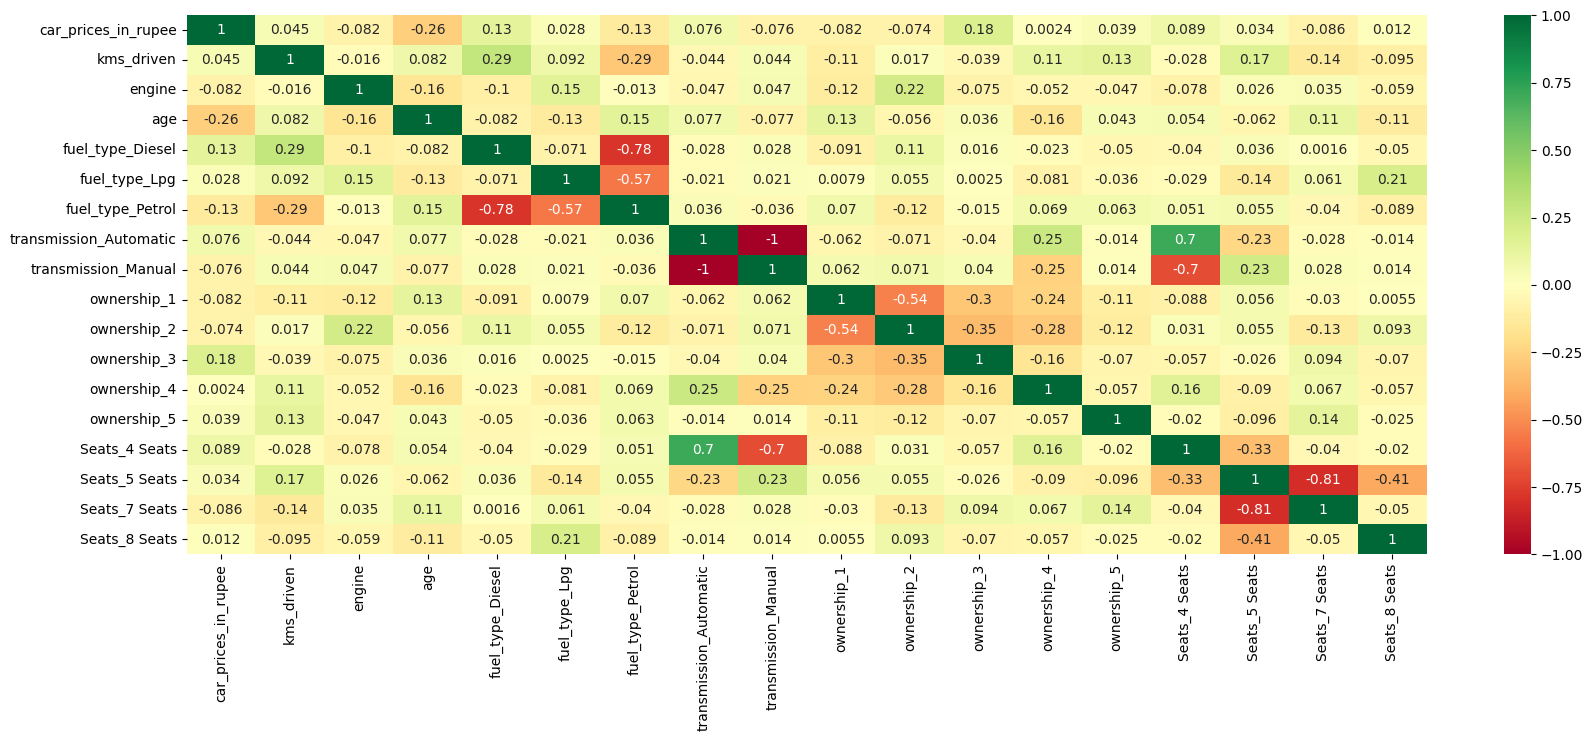

In [91]:
# visualizing the heat map of correlation matrix
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

From the above results, we can say that "age" has the best relation with "car_prices_in_rupee" inversely.

This means that when age of the car increases, its price drops.

# Importing Data

Once H2O is initialized, in the below code we are importing the data into a h2o dataframe.

In [92]:
data = h2o.H2OFrame(df)
data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,age
1,0.278402,Petrol,Manual,3,0.228493,5 Seats,0.470588
0.307697,0.315741,Petrol,Manual,3,0.0896677,5 Seats,0.764706
0.765827,0.241918,Petrol,Manual,4,0,5 Seats,0.411765
0.369236,0.203724,Petrol,Manual,1,0.319071,5 Seats,0.470588
0.846167,0.278402,Petrol,Manual,2,1,5 Seats,0.411765
0.987784,0.295163,Petrol,Manual,3,0.317251,5 Seats,0.235294
0.384621,0.0420472,Petrol,Manual,2,0.786072,5 Seats,0.294118
0.461546,0.203724,Petrol,Manual,2,0.54711,5 Seats,0.588235
0.830782,0.0882764,Petrol,Manual,3,0.629495,5 Seats,0.529412
0.461546,0.278402,Petrol,Manual,2,0.365498,5 Seats,0.705882


#Studying Data

In [93]:
data.describe()

Rows:123
Cols:8

,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,age
type,real,real,enum,enum,int,real,enum,real
mins,0.0,0.0,,,1.0,0.0,,0.0
mean,0.6272942035255827,0.27156213414436836,,,2.1463414634146334,0.28960037893505924,,0.4748923959827835
maxs,1.0,1.0,,,5.0,1.0,,1.0
sigma,0.2603126202072323,0.14040887645805183,,,1.0688045016629046,0.20566841048183523,,0.2023979468950459
zeros,3,1,,,0,5,,3
missing,0,0,0,0,0,0,0,0
0,1.0,0.2784017504424646,Petrol,Manual,3.0,0.22849340009103325,5 Seats,0.4705882352941176
1,0.3076970414929461,0.31574054021761044,Petrol,Manual,3.0,0.08966772872098316,5 Seats,0.7647058823529412
2,0.7658271665717935,0.2419180189531697,Petrol,Manual,4.0,0.0,5 Seats,0.4117647058823529


# Splitting into training and testing sets

In [94]:
y = "car_prices_in_rupee" 
x = data.columns

target=y

splits = data.split_frame(ratios=[0.75], seed=1)  

train = splits[0]
test = splits[1]

print ("Rows in Train",train.nrow)
print ("Rows in Test",test.nrow)

Rows in Train 98
Rows in Test 25


# H20 AutoML Execution
The max_runtime_secs argument provides a way to limit the AutoML run by time

In [95]:
# Set up AutoML
import time
aml = H2OAutoML(max_runtime_secs=60)

# set model start time and train the aml model
model_start_time = time.time()
aml.train(x=x,y=y,training_frame=data)

AutoML progress: |█
03:35:52.417: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 123.0.

██████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20230416_33550_model_13


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    32                 32                          8658                   1            7            4.875         2             51            16.875

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.025174490883974613
RMSE: 0.15866471215734965
MAE: 0.12691492323831813
RMSLE: 0.10683535615514358
Mean Residual Deviance: 0.025174490883974613

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.05989092918114661
RMSE: 0.24472623312825825
MAE: 0.20385830937117025
RMSLE: 0.1614511688171516
Mean Residual Deviance: 0.05989092918114661

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.206407   0.00970466  0.209721      0.198933      0.194057      0.211411      0.21791
mean_residual_deviance  0.0616245  0.00531248  0.0644952     0.0530049     0.0600043     0.0647732     0.0658449
mse                     0.0616245  0.00531248  0.0644952     0.0530049     0.0600043     0.0647732     0.0658449
r2                      0.020901   0.240515    0.160782      0.0954265     0.133422      0.12217       -0.407295
residual_deviance       0.0616245  0.00531248  0.0644952     0.0530049     0.0600043     0.0647732     0.0658449
rmse                    0.248051   0.0109194   0.253959      0.230228      0.244958      0.254506      0.256603
rmsle                   0.163174   0.0110639   0.169754      0.145044      0.161928      0.173708      0.165434

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-04-16 03:36:30  5.545 sec   0                  0.259252         0.215439        0.0672117
    2023-04-16 03:36:30  5.552 sec   5                  0.240787         0.19787         0.0579785
    2023-04-16 03:36:30  5.560 sec   10                 0.198238         0.162071        0.0392985
    2023-04-16 03:36:30  5.572 sec   15                 0.19338          0.157209        0.0373959
    2023-04-16 03:36:30  5.608 sec   20                 0.184866         0.150505        0.0341755
    2023-04-16 03:36:30  5.619 sec   25                 0.169745         0.137608        0.0288135
    2023-04-16 03:36:30  5.625 sec   30                 0.15958          0.128089        0.0254656
    2023-04-16 03:36:30  5.634 sec   32                 0.158665         0.126915        0.0251745

Variable Importances: 
variable      relative_importance    scaled_importance    percentage
------------  ---------------------  -------------------  ------------
age           10.1917                1                    0.356
kms_driven    9.55844                0.937868             0.333881
engine        5.58293                0.547793             0.195014
ownership     1.98581                0.194846             0.0693652
fuel_type     0.64909                0.0636883            0.022673
Seats         0.488189               0.0479007            0.0170527
transmission  0.172172               0.0168934            0.00601406

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Interpreting the above results

MAE: The mean absolute error (MAE) is the average absolute difference between the target values and the predicted values. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSE: The root-mean-square error metric is a frequently used measure of the differences between the values predicted by a model or an estimator and the values observed. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSLE: The root-mean-squared logarithmic error metric is similar to RMSE, except that it uses the natural logarithm of the predicted and actual values plus 1. RMSLE penalizes under-prediction more heavily than over-prediction. It can also be a good metric when you don't want to penalize differences for large prediction values more heavily than for small prediction values. This metric ranges from zero to infinity; a lower value indicates a higher quality model. The RMSLE evaluation metric is returned only if all label and predicted values are non-negative.

r^2: r squared (r^2) is the square of the Pearson correlation coefficient between the labels and predicted values. This metric ranges between zero and one; a higher value indicates a higher quality model.

MAPE: Mean absolute percentage error (MAPE) is the average absolute percentage difference between the labels and the predicted values. This metric ranges between zero and infinity; a lower value indicates a higher quality model.

K-fold cross-validation is used to validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split.

Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the h2o.automl() function for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance.

In [96]:
# printing the leaderBoard for models used
print(aml.leaderboard)

model_id                                                    rmse        mse       mae     rmsle    mean_residual_deviance
GBM_grid_1_AutoML_2_20230416_33550_model_13             0.244726  0.0598909  0.203858  0.161451                 0.0598909
StackedEnsemble_BestOfFamily_5_AutoML_2_20230416_33550  0.249315  0.0621581  0.206537  0.16464                  0.0621581
GBM_grid_1_AutoML_2_20230416_33550_model_7              0.249958  0.062479   0.210288  0.164712                 0.062479
StackedEnsemble_AllModels_4_AutoML_2_20230416_33550     0.251011  0.0630064  0.209646  0.16548                  0.0630064
GBM_grid_1_AutoML_2_20230416_33550_model_2              0.2511    0.063051   0.209593  0.164918                 0.063051
GBM_grid_1_AutoML_2_20230416_33550_model_1              0.251549  0.0632769  0.208746  0.166418                 0.0632769
GBM_grid_1_AutoML_2_20230416_33550_model_10             0.251702  0.0633537  0.207544  0.166285                 0.0633537
GBM_grid_1_AutoML_2_202304

In [97]:
# predicting on test data
prediction = aml.leader.predict(test)
prediction.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
0.722886
0.487046
0.568941
0.721883
0.760131
0.365452
0.600182
0.728461
0.607241
0.710047


In [98]:
# Finding & storing the best model
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])
best_model.algo

'gbm'

In [99]:
# performance of the gbm model
best_model.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.01700489487906581
RMSE: 0.13040281775738516
MAE: 0.1033540447878762
RMSLE: 0.08475614694377485
Mean Residual Deviance: 0.01700489487906581

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_2_20230416_33550_model_1,0.0220702,0.000487092,0.0153322,0.0144163,0.000487092,277,0.008099,XGBoost
XGBoost_grid_1_AutoML_2_20230416_33550_model_8,0.0278739,0.000776953,0.0214359,0.0185389,0.000776953,166,0.009084,XGBoost
XGBoost_grid_1_AutoML_2_20230416_33550_model_3,0.0459448,0.00211092,0.0361657,0.030723,0.00211092,406,0.00882,XGBoost
GBM_grid_1_AutoML_2_20230416_33550_model_15,0.0518538,0.00268881,0.0411583,0.0360872,0.00268881,59,0.012274,GBM
XGBoost_3_AutoML_2_20230416_33550,0.0816463,0.00666612,0.0632817,0.0533826,0.00666612,405,0.008418,XGBoost
XGBoost_grid_1_AutoML_2_20230416_33550_model_2,0.0939236,0.00882164,0.0734325,0.0624751,0.00882164,346,0.006735,XGBoost
GBM_grid_1_AutoML_2_20230416_33550_model_8,0.102087,0.0104218,0.0787151,0.0704351,0.0104218,126,0.010835,GBM
DRF_1_AutoML_2_20230416_33550,0.110774,0.0122708,0.0907807,0.0748031,0.0122708,105,0.017304,DRF
XGBoost_grid_1_AutoML_2_20230416_33550_model_11,0.113203,0.0128149,0.0887849,0.0747314,0.0128149,159,0.005882,XGBoost
GBM_5_AutoML_2_20230416_33550,0.124095,0.0153996,0.0998003,0.081115,0.0153996,73,0.009104,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

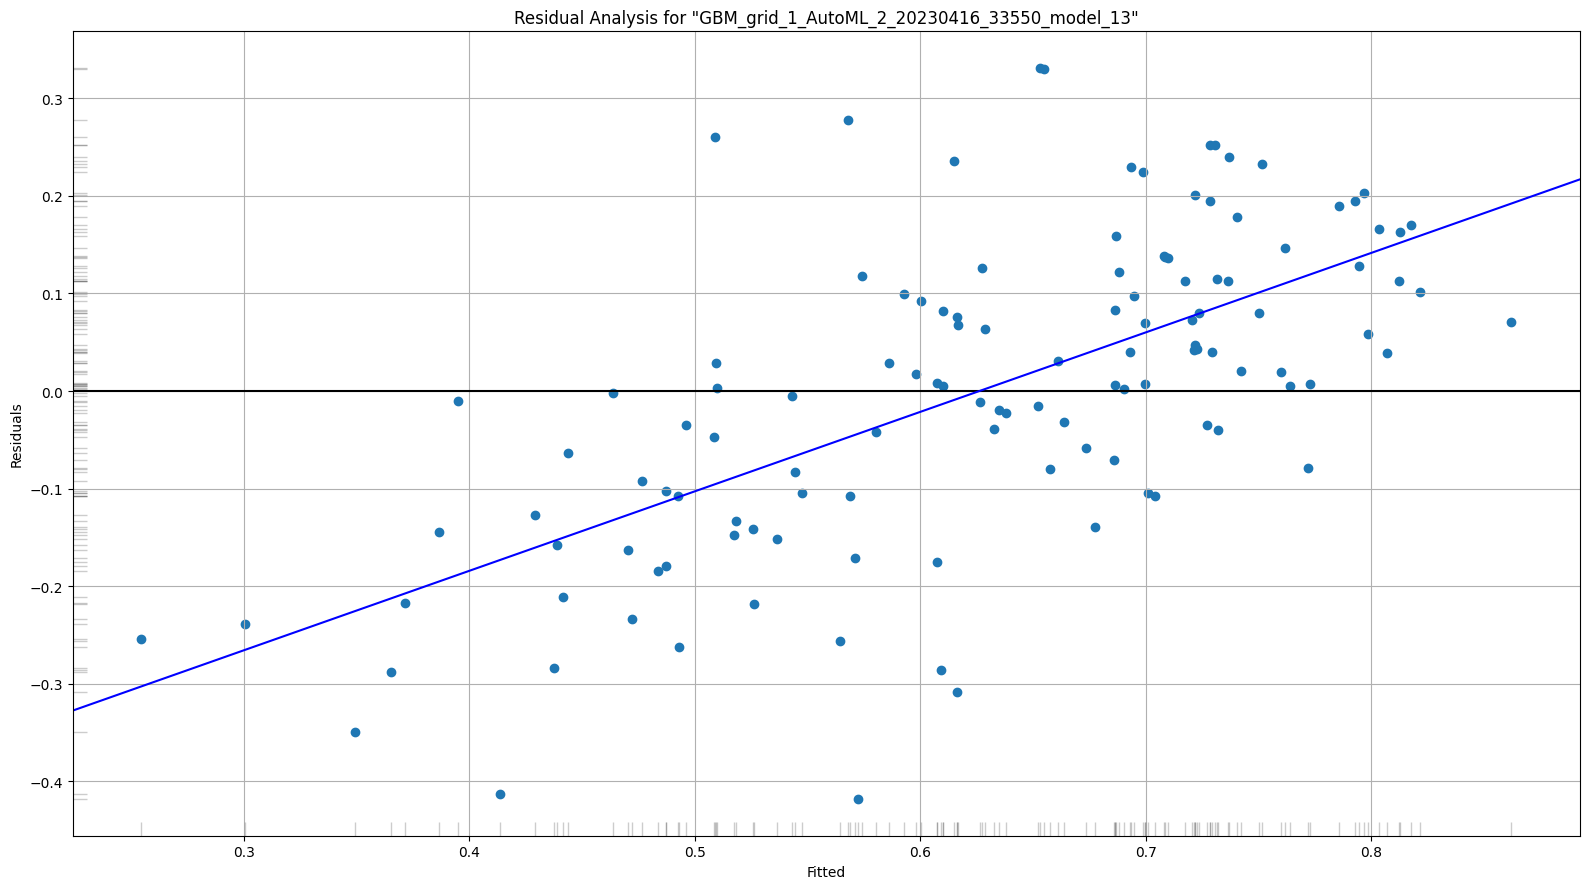

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

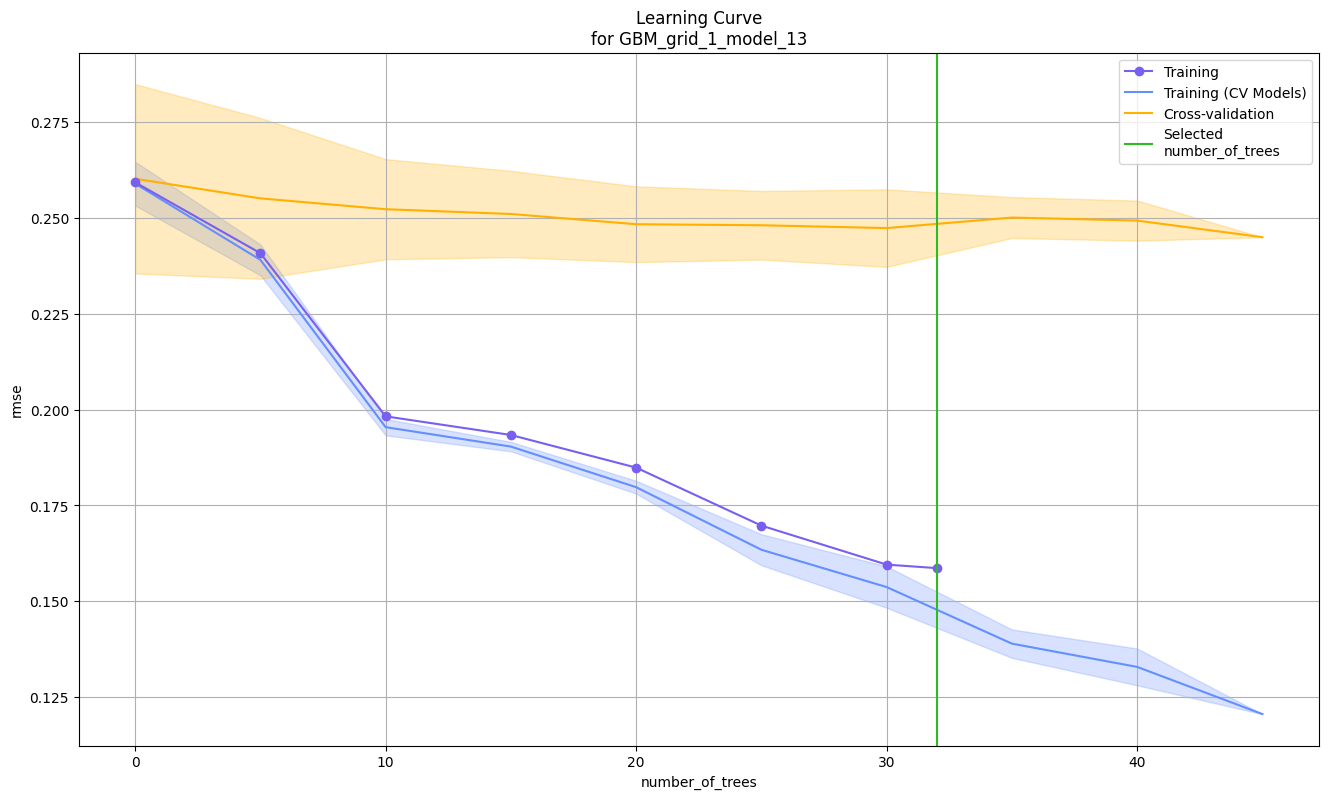

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

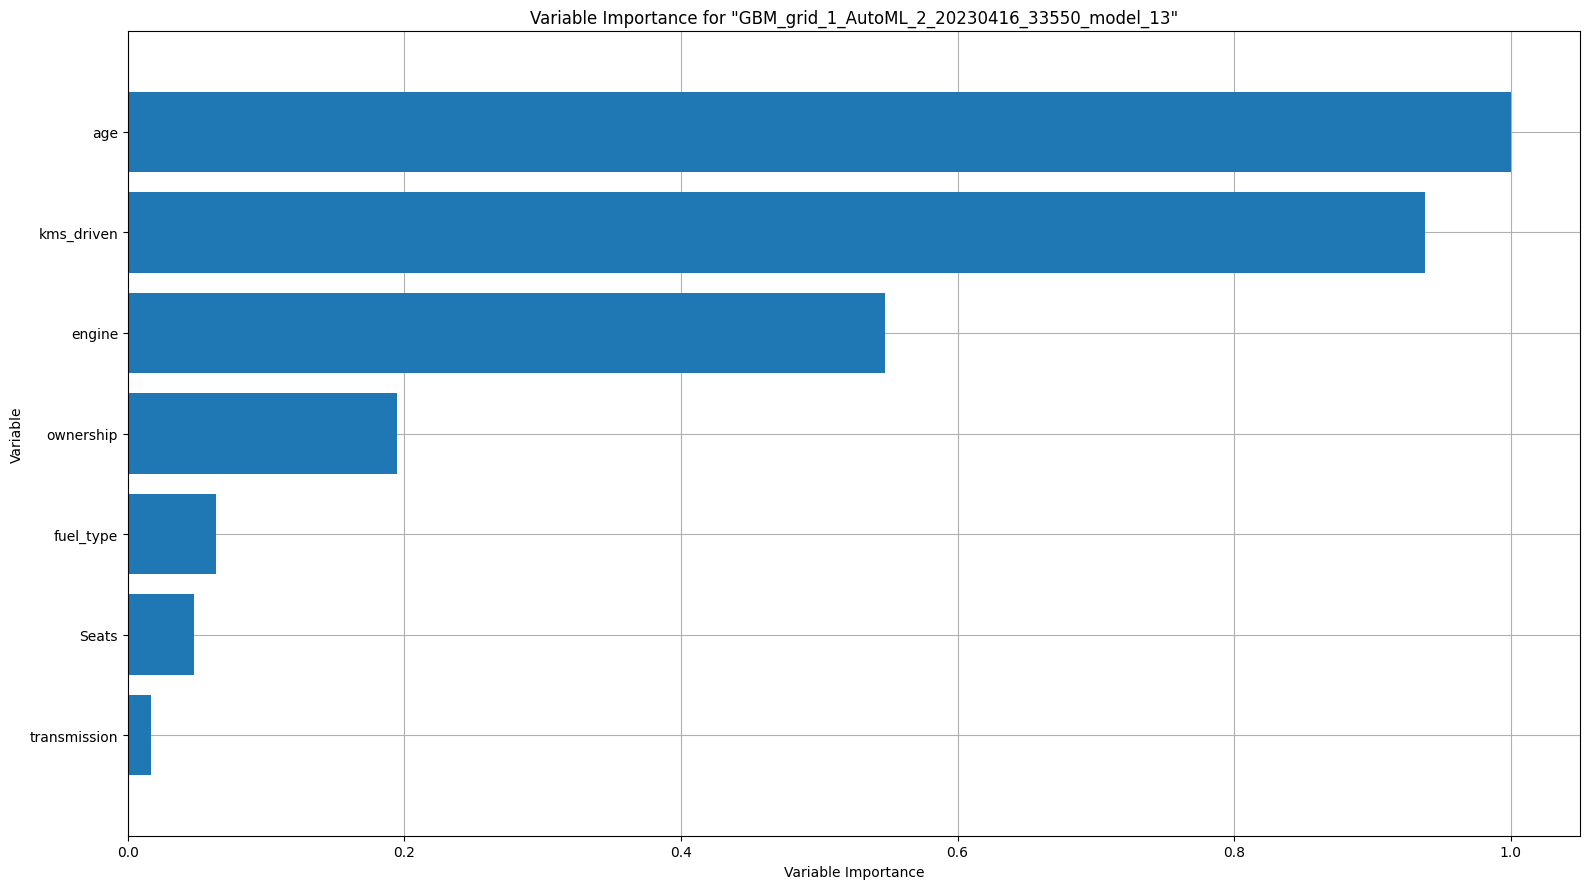

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

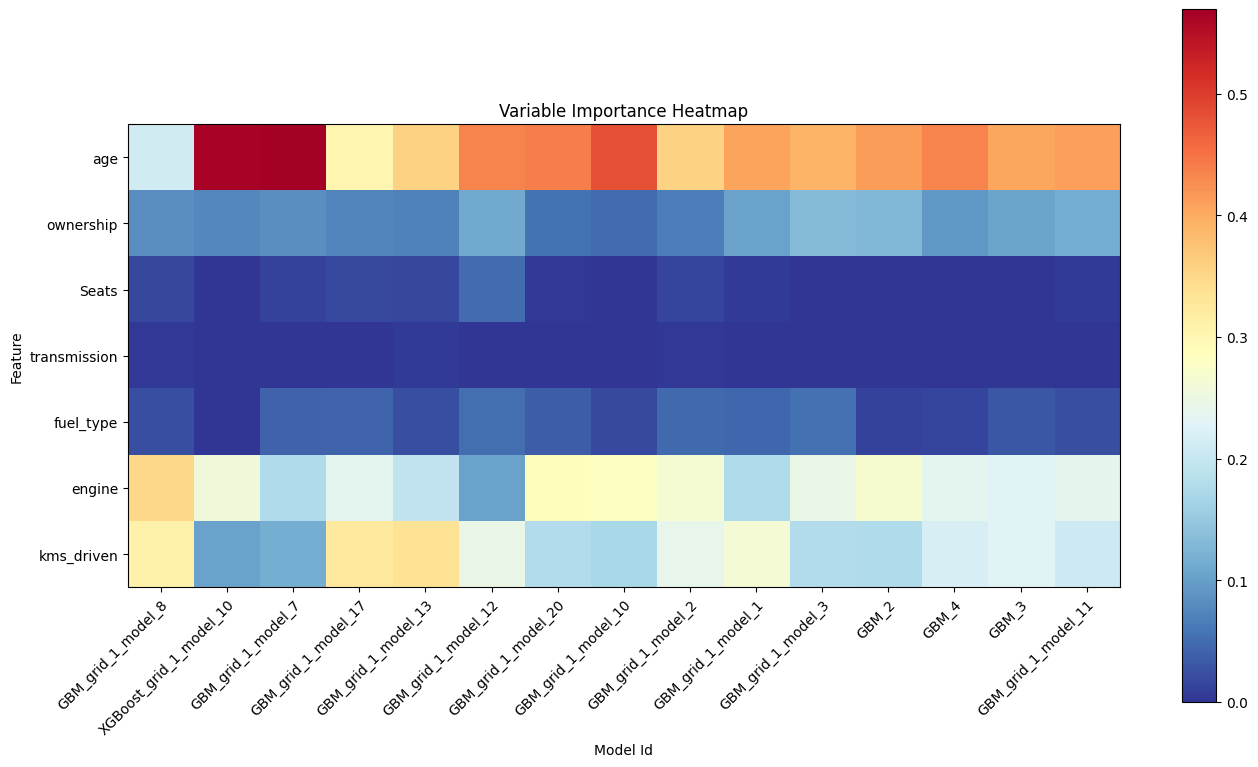

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

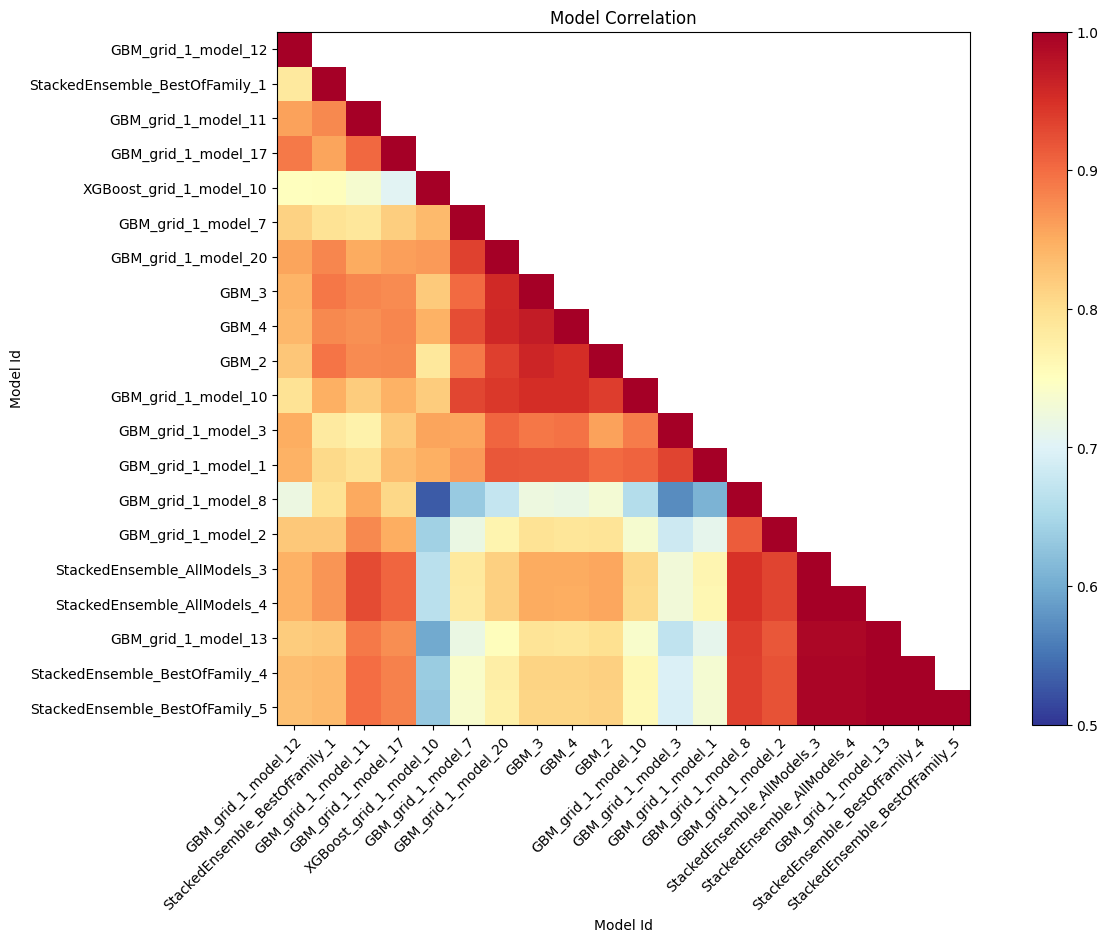

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

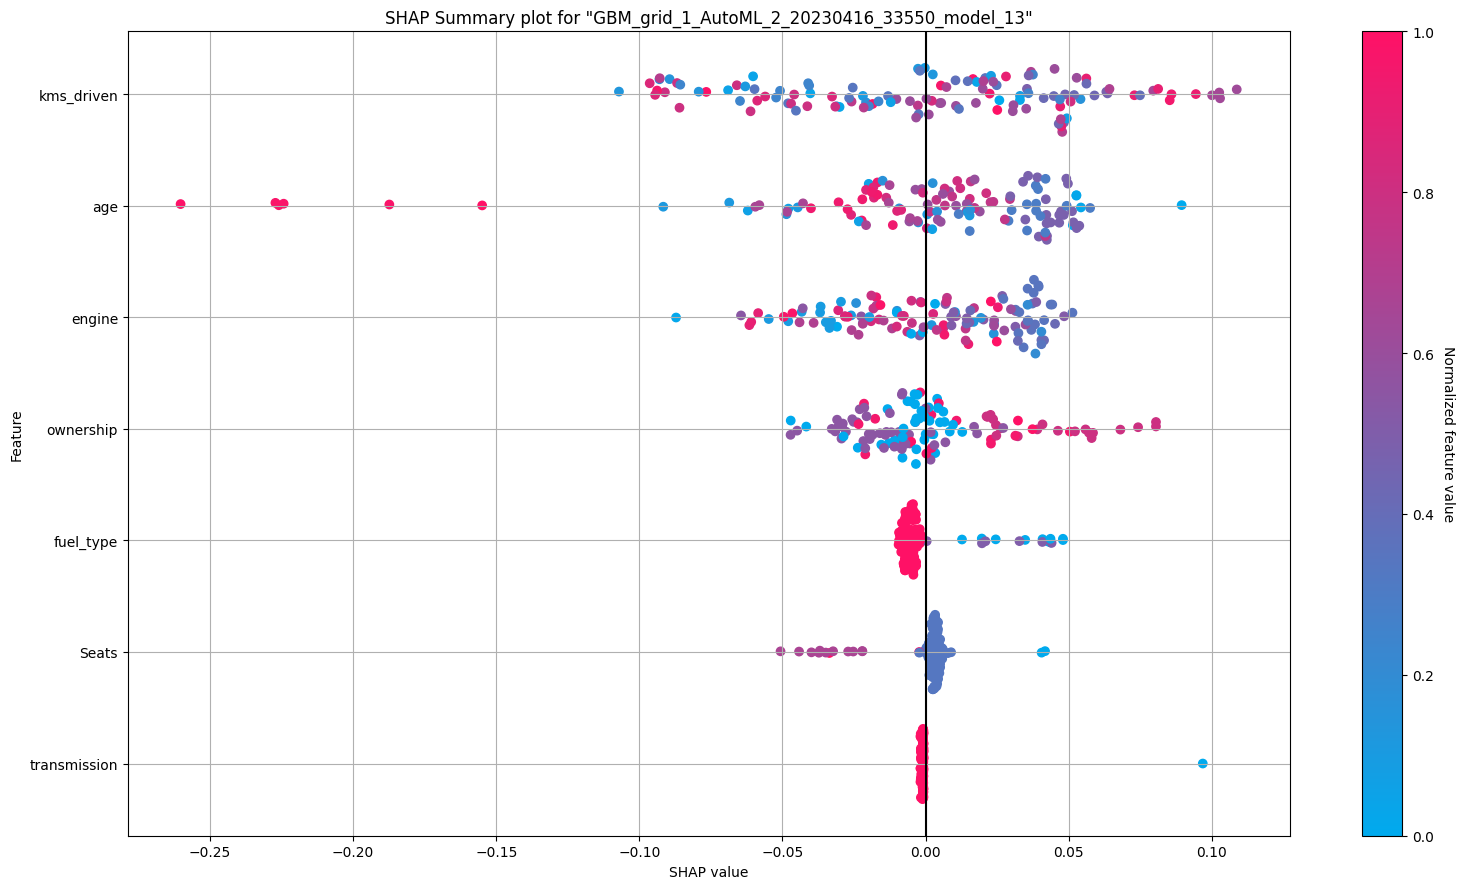

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

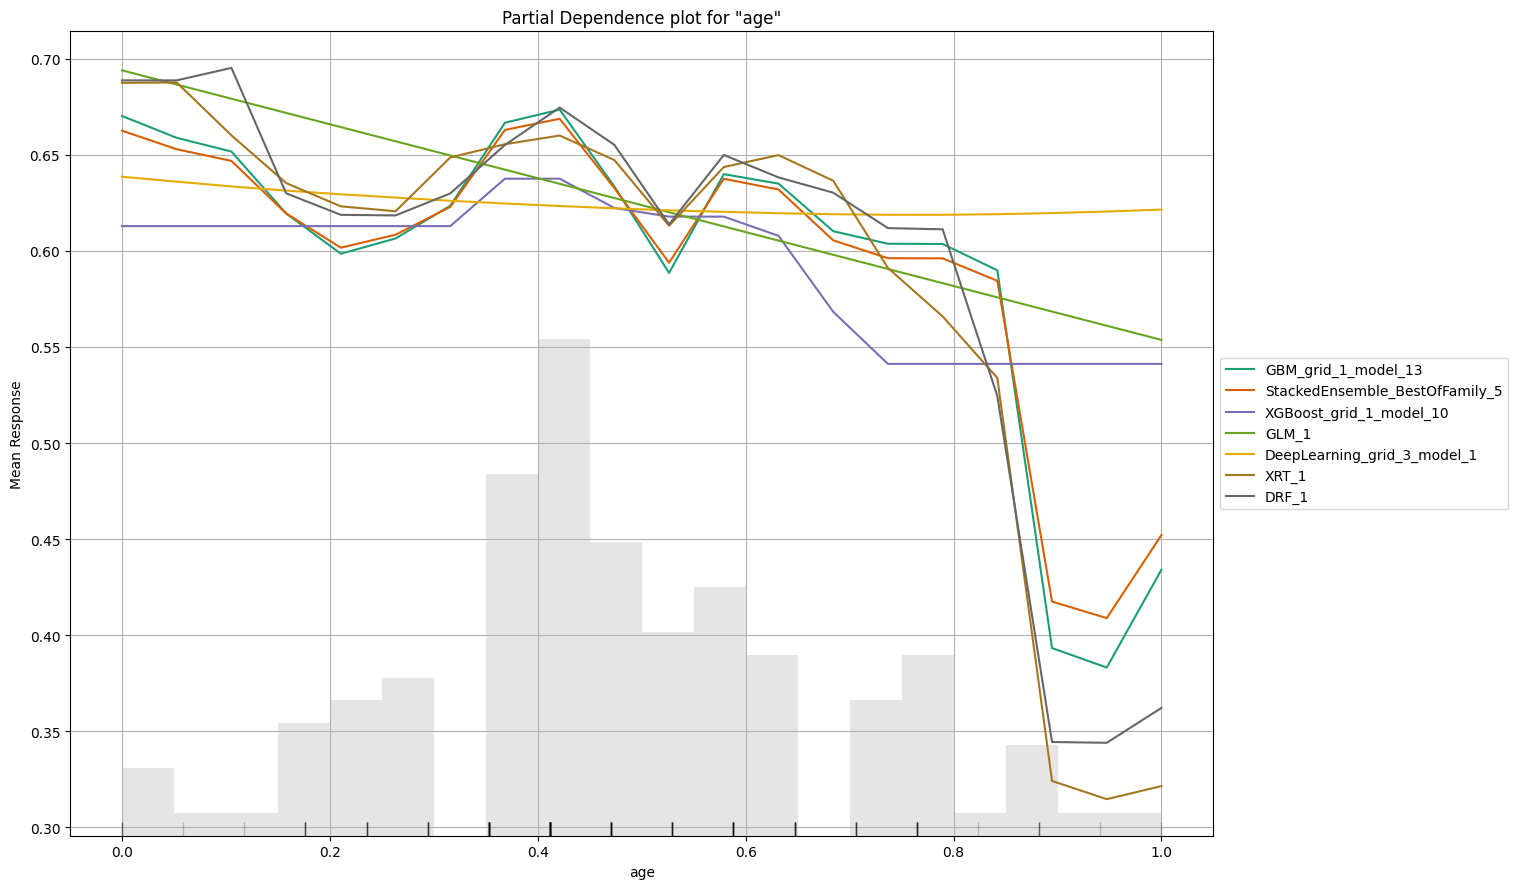

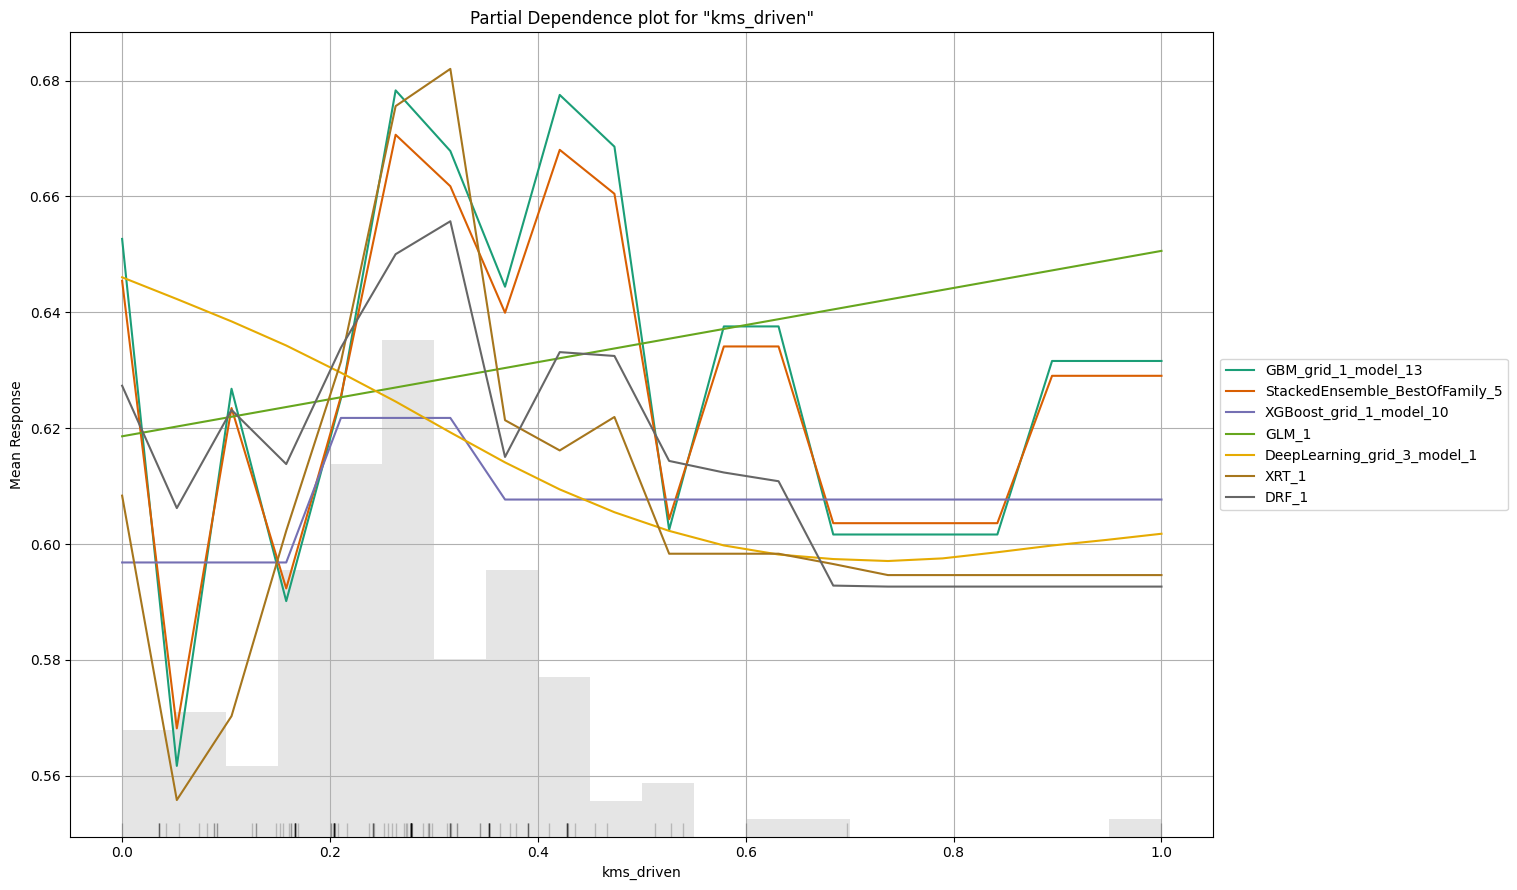

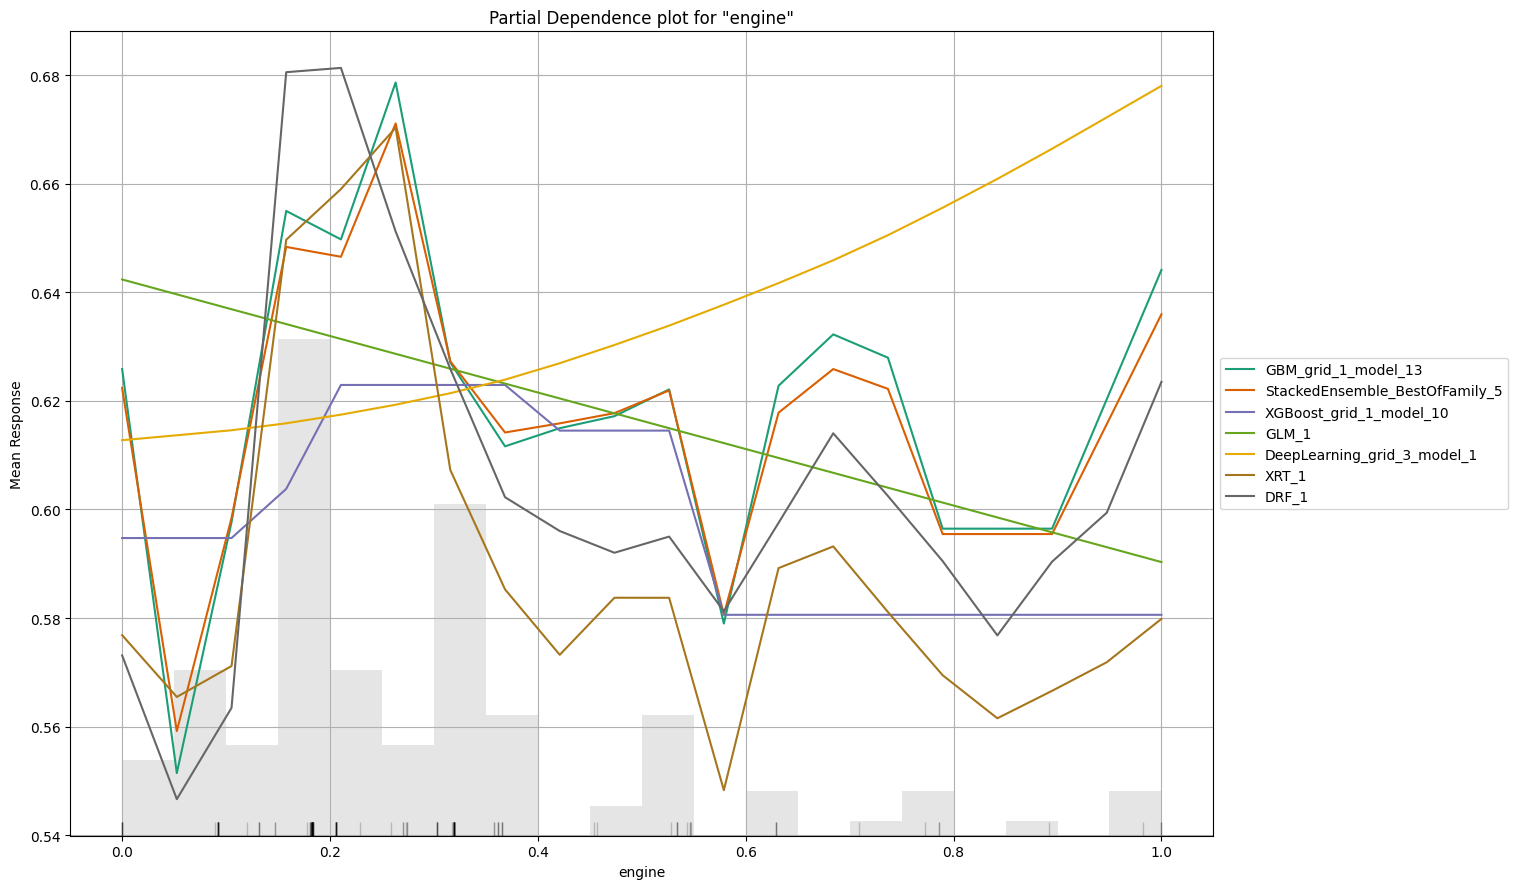

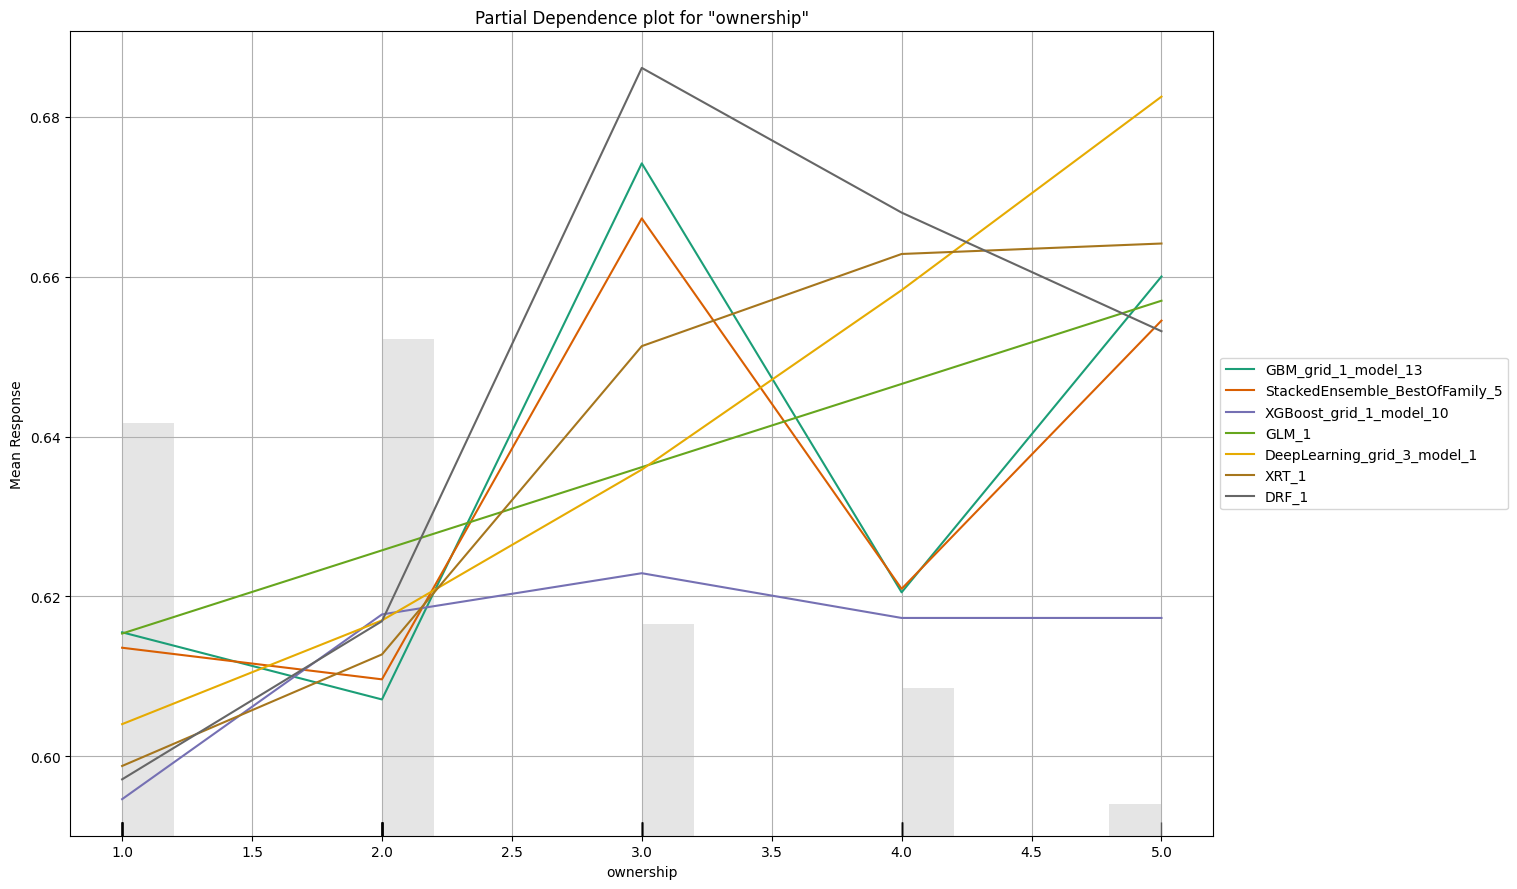

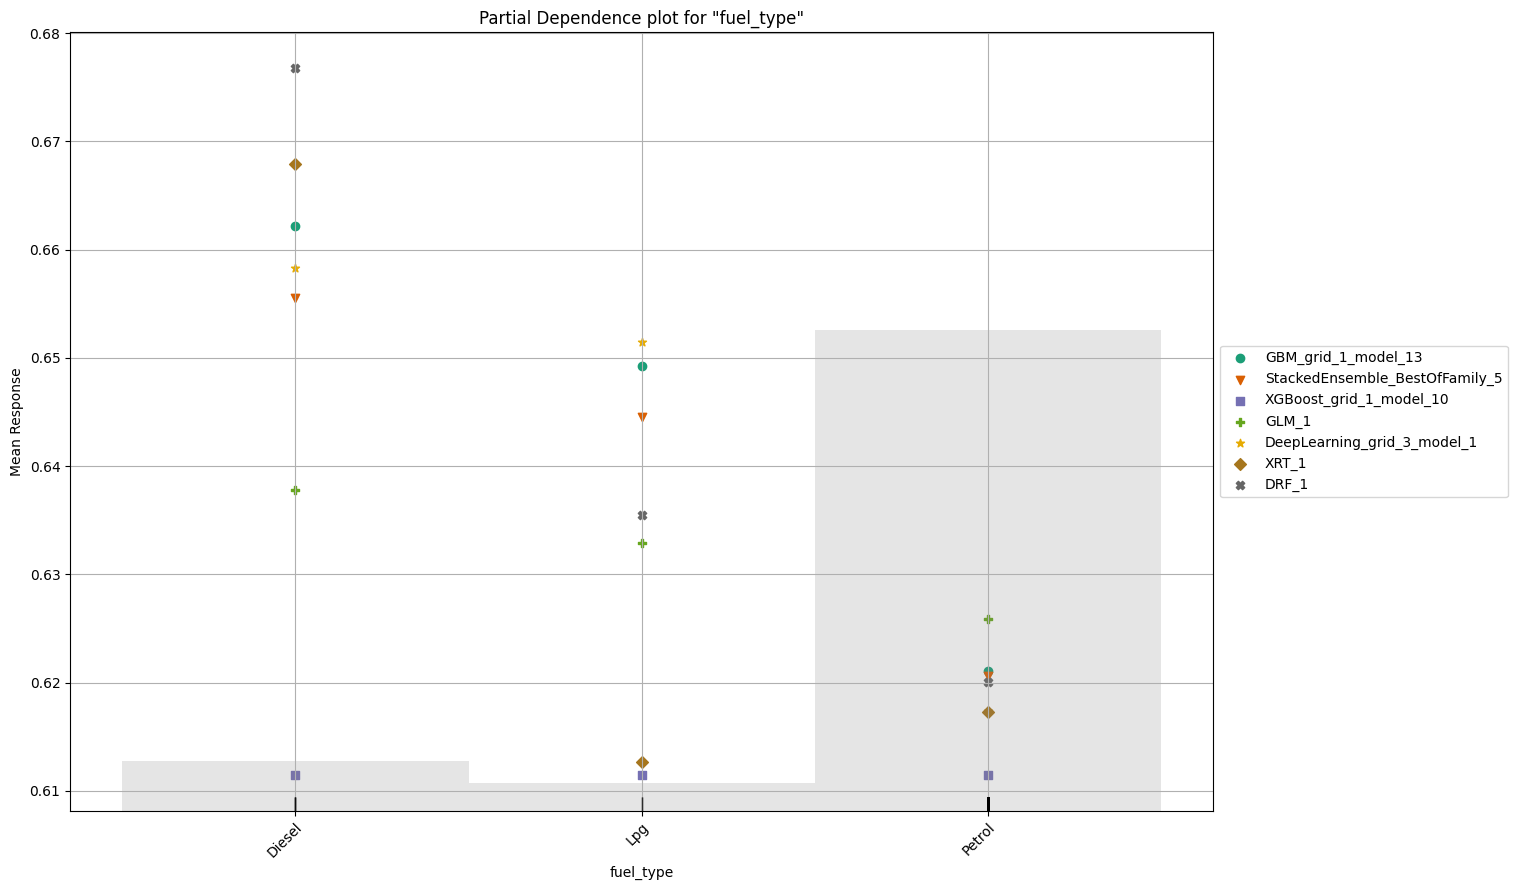

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

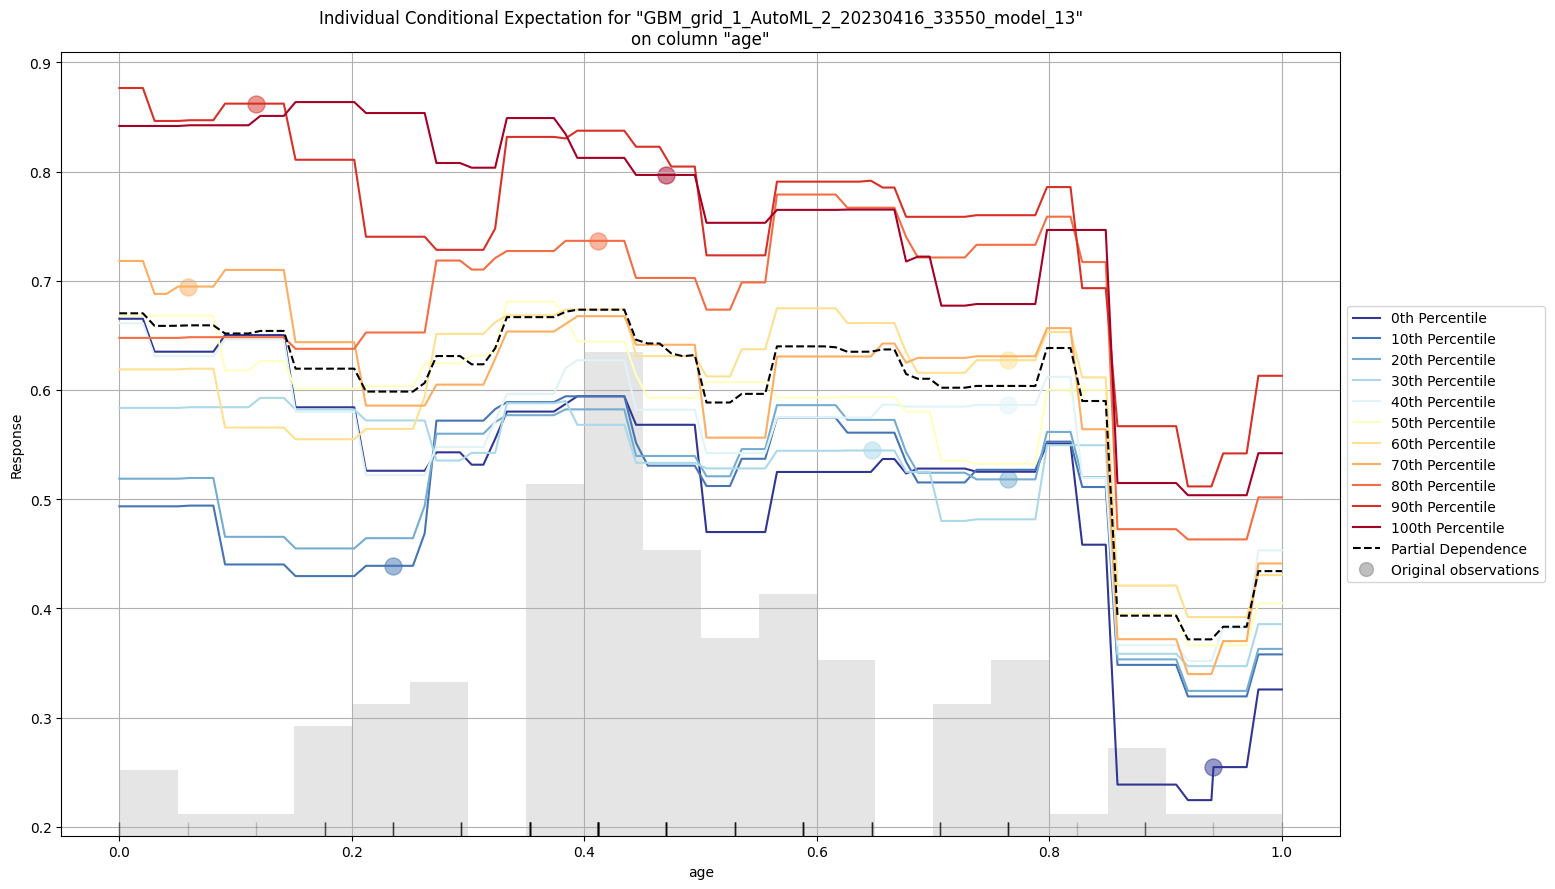

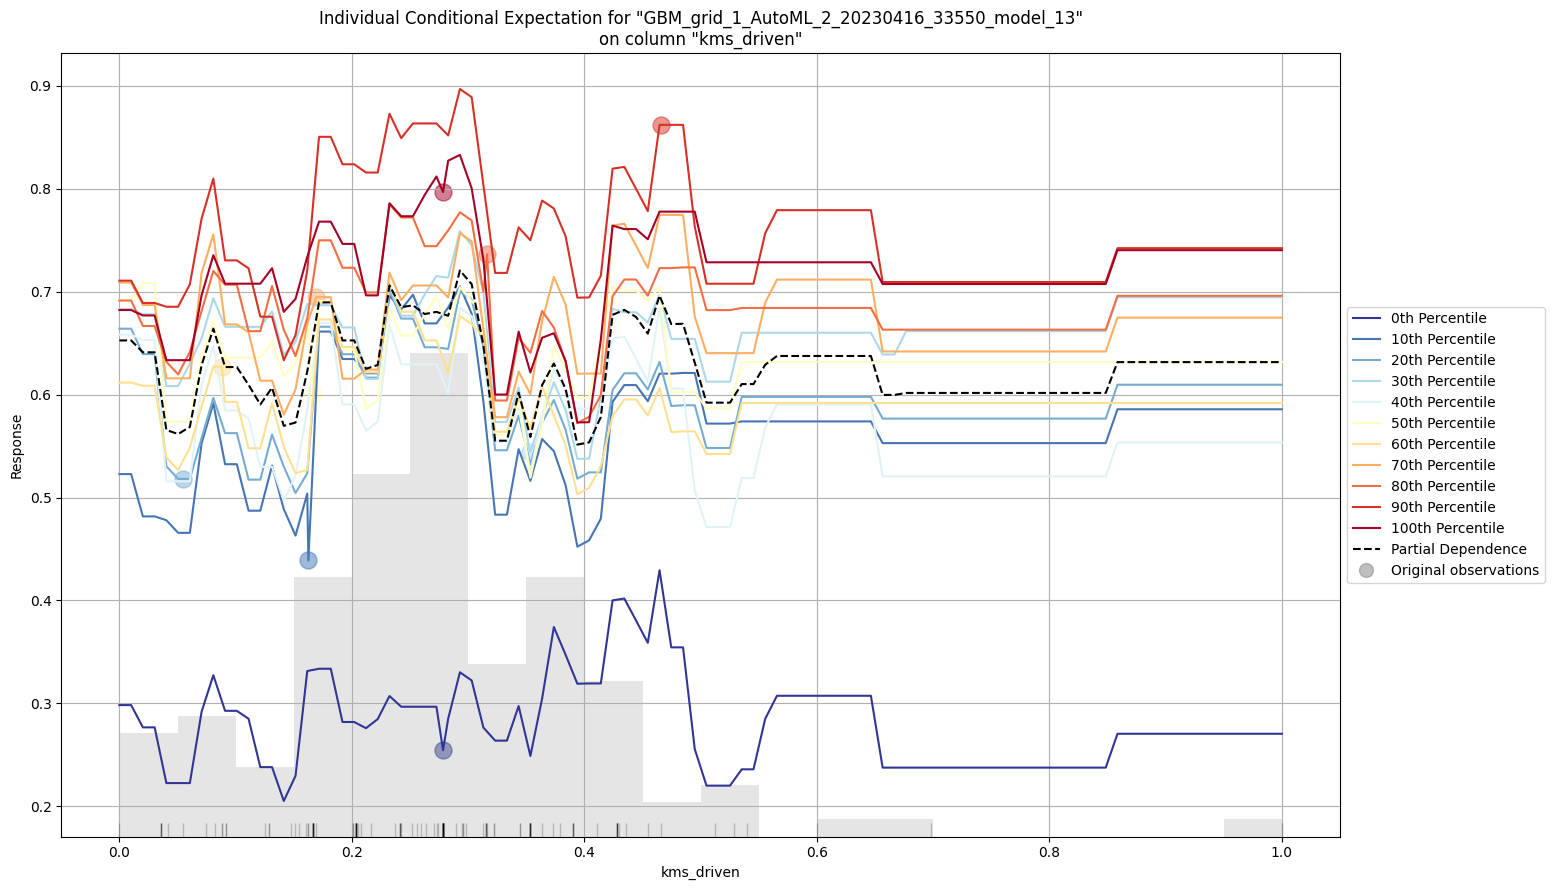

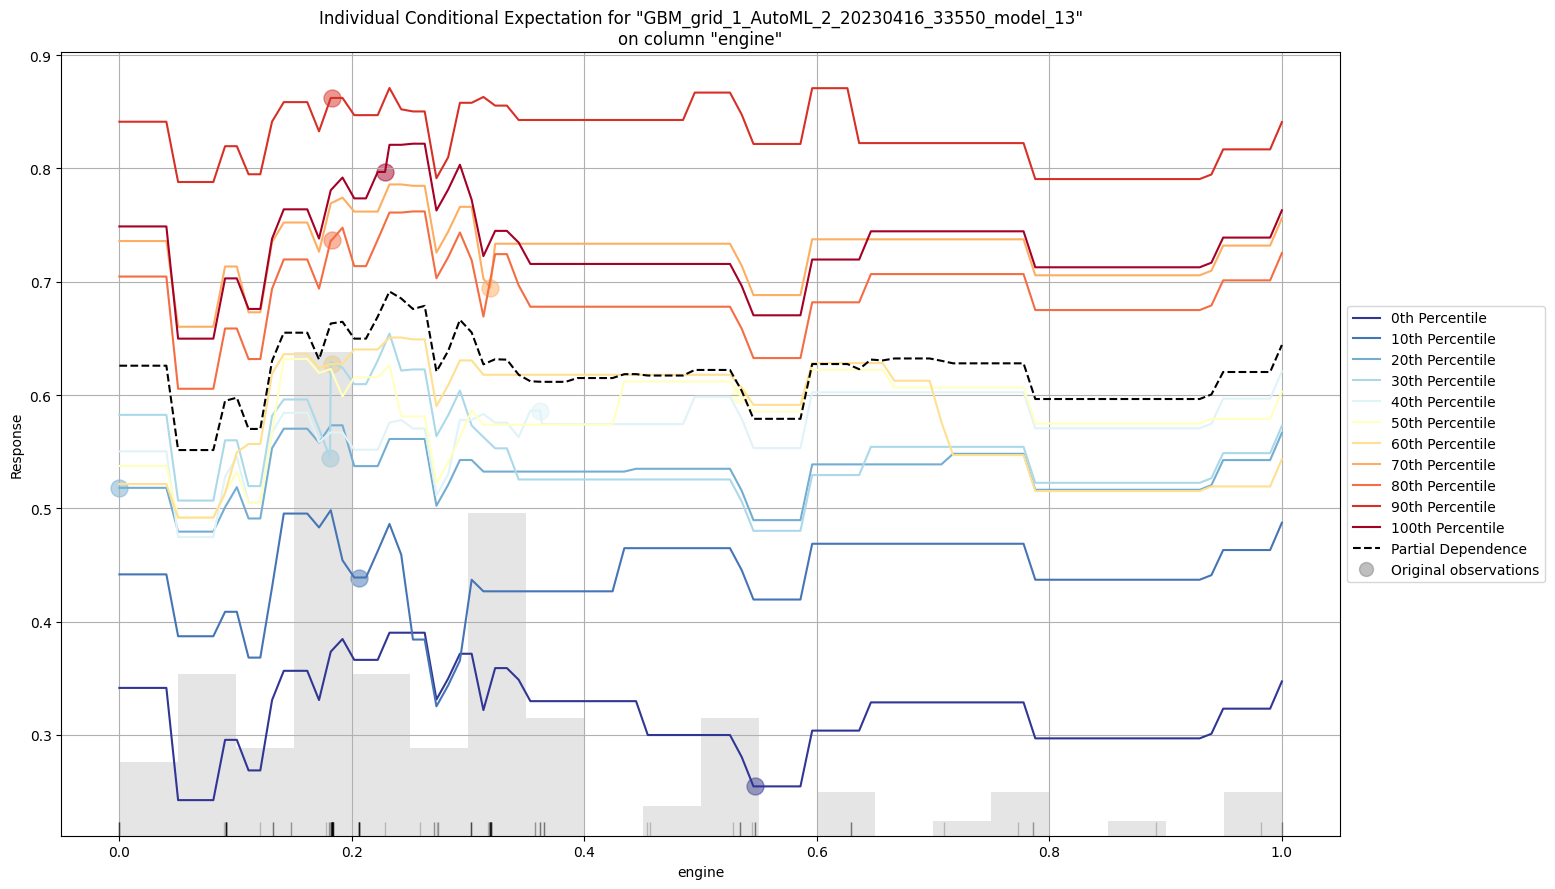

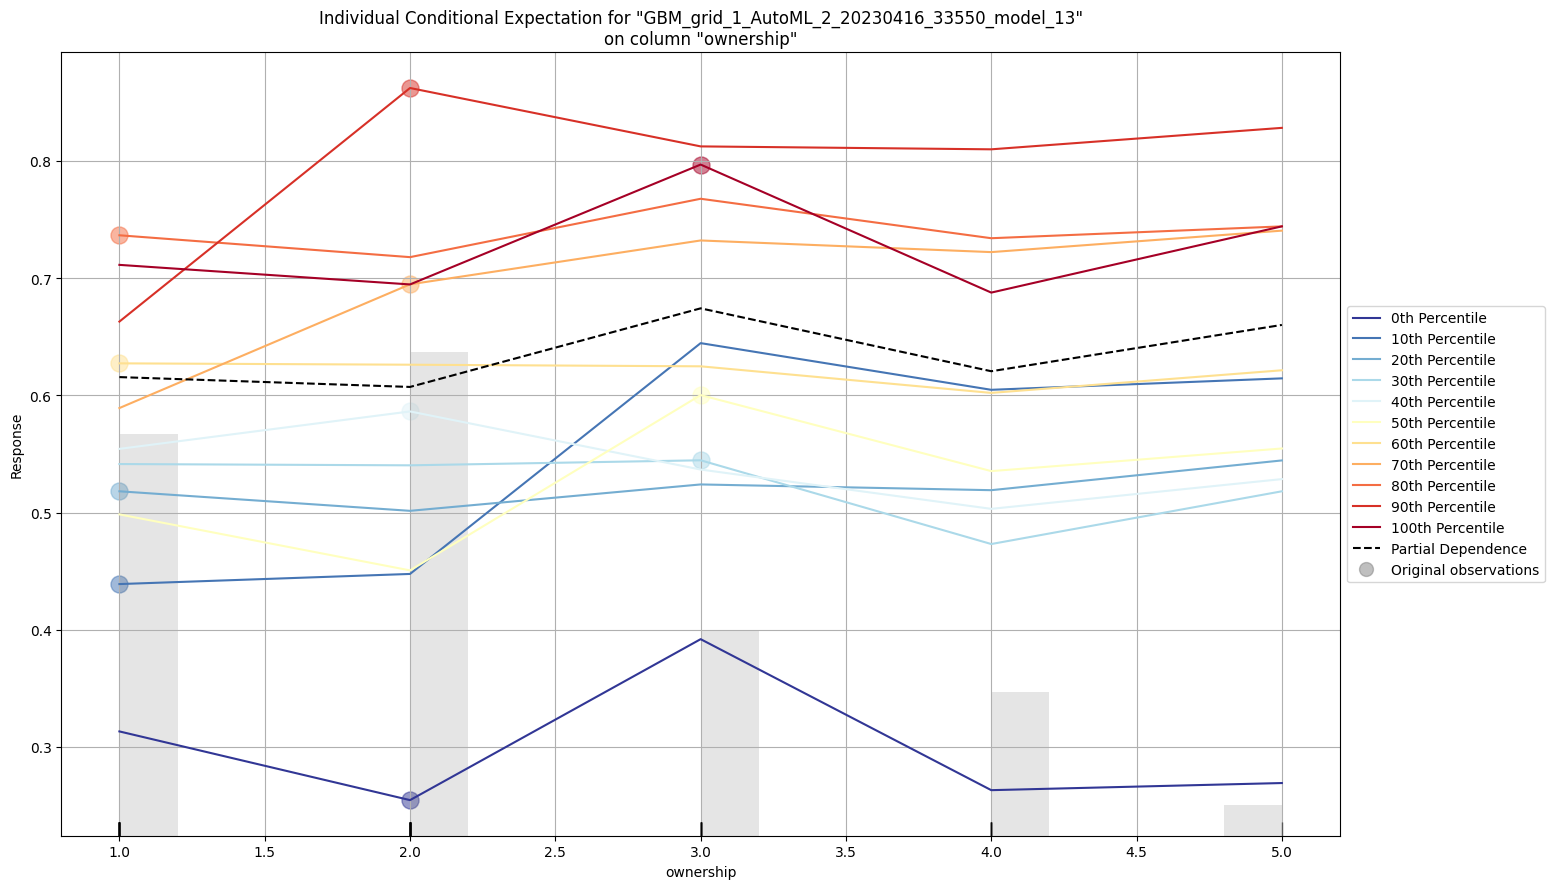

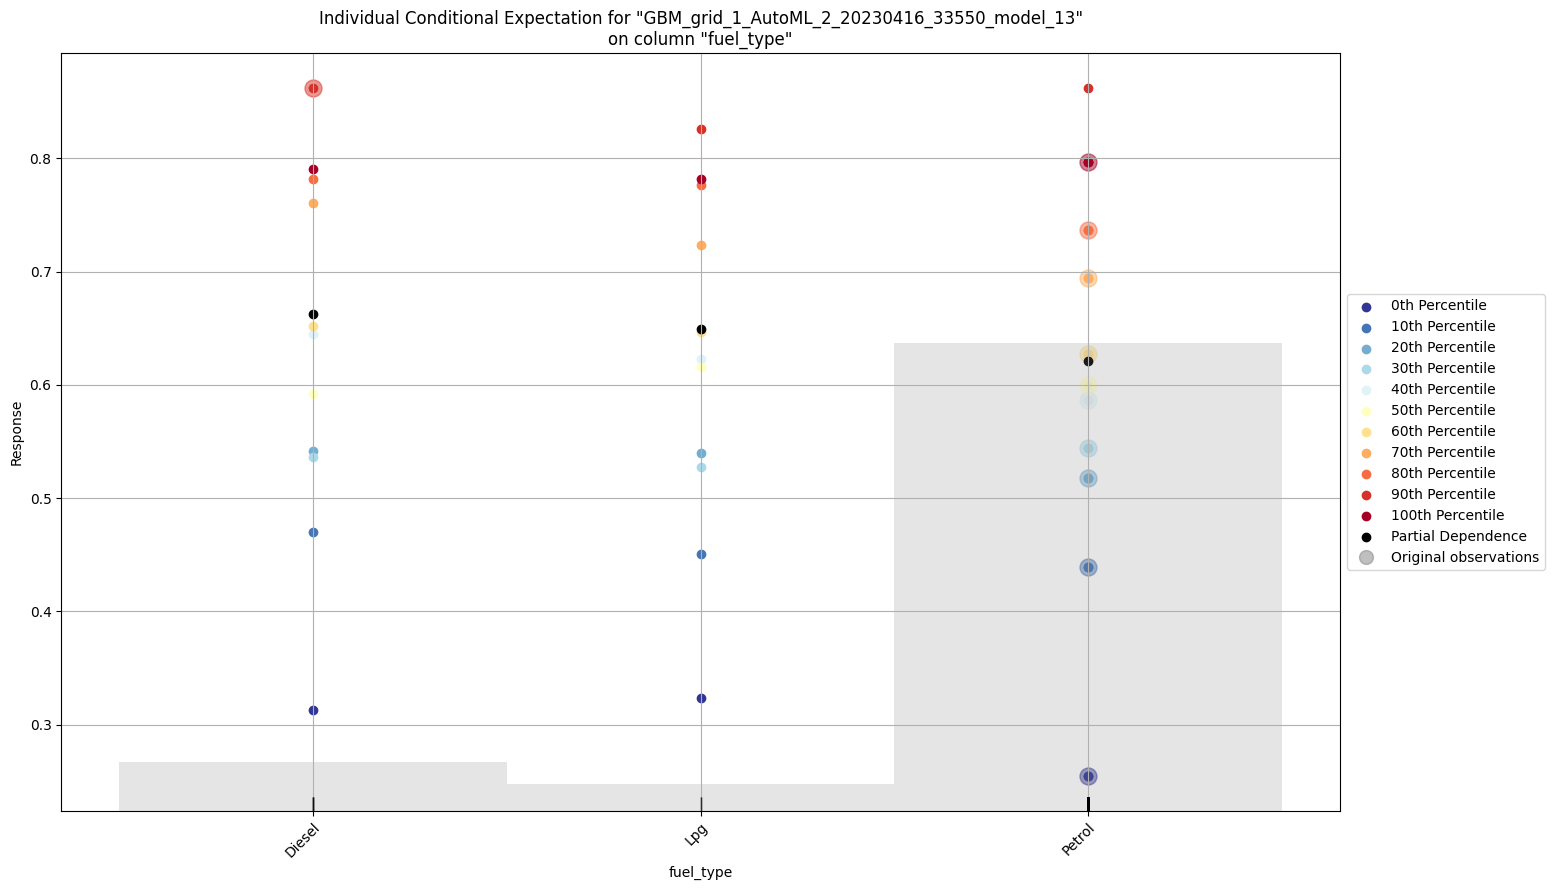

In [100]:
model_explain = aml.explain(data)

In [101]:
regressor = RandomForestRegressor()

## Hyperparameters 
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

# min. number of sample required to split a node
min_samples_split = [2,5,10,15,100]

# min. number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

#Create the random grid
random_grid= {'n_estimators': n_estimators, 
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


#Answer the following questions for all of the models:

##1.Is the relationship significant? 
Yes, the relationship is significant as the strength of evidence against the null hypothesis was less than 0.05. The results are statistically significant.



##2.Are any model assumptions violated?
None of the assumptions are violated.


##3.Is there any multicollinearity in the model?
Yes. I detected multicollinearity by analyzing the correlation matrix and by examining the p-values of all variables. In the present study, the OLS summary indicated that the p-values for multiple features were greater than 0.05, suggesting that these variables are not significant. Upon rechecking the values, the model met the expected output. Thus, it was concluded that these unnecessary variables were causing multicollinearity and their removal improved the model's performance.

##4.In the multivariate models are predictor variables independent of all the other predictor variables?
By referring to correlation matrix and heat map, the variables were independent of all other predictor variables as none of the values were more than 0.2 or less than -0.2.



##5.In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
Most significant was age and most insignificant was engine among the numerical predictors.

##6.Does the model make sense? 
Yes somewhat. However, the model seems imperfect for the proposed solution as RMS and p-values are not as expected.



##7.Does regularization help? 
Not much, regularization would be ineffective.



##8.Which independent variables are significant? 
"age" was the most significant.



##9.Which hyperparameters are important?
To optimize the performance of the model, a RandomForestRegressor is employed. The hyperparameters used for tuning the model include 'max_depth' of 30, 'min_samples_split' of 2, and 'n_estimators' of 100.

# References

**References:**

1. https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction/code
2. https://www.w3schools.com/python/pandas/
3. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb




#License

MIT License

Copyright (c) 2023 Aashay Pawar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.